# Introduction to the California Housing Dataset

The California housing dataset contains various features such as the number of rooms, house size, and age of the house to predict the median house value for California districts. This dataset is a great way to get started with regression tasks because it is well-structured, has no missing values, it includes numerical features and symbolic features.

we split the dataset into training, validation, and test sets. It's crucial to scale the features so that they all have similar ranges, which helps the neural network to converge faster during training.

## Symbolic Sequential Prediction 

In [3]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:
# Loading the dataset
file_path = "C:/Users/lamin/OneDrive/Desktop/Datafolder/cali housing data/housing.csv"
data = pd.read_csv(file_path)

 # Task 1: Prepare symbolic data

In [5]:
# Encode `ocean_proximity` as symbolic data
label_encoder = LabelEncoder()
data['ocean_proximity_encoded'] = label_encoder.fit_transform(data['ocean_proximity'])


In [6]:
# Define predictor variables (features) and target
features = ['longitude', 'latitude', 'housing_median_age', 'median_income']
X = data[features]
y = data['ocean_proximity_encoded']

In [7]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_classifier.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [8]:
# Evaluate on test set
y_pred = mlp_classifier.predict(X_test)
print("Task 1: Classification Report")
print(classification_report(y_test, y_pred))

Task 1: Classification Report
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      1795
           1       0.77      0.73      0.75      1324
           2       0.00      0.00      0.00         1
           3       0.65      0.75      0.69       436
           4       0.71      0.34      0.46       572

    accuracy                           0.74      4128
   macro avg       0.57      0.54      0.54      4128
weighted avg       0.74      0.74      0.72      4128



C:\Users\lamin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lamin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lamin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


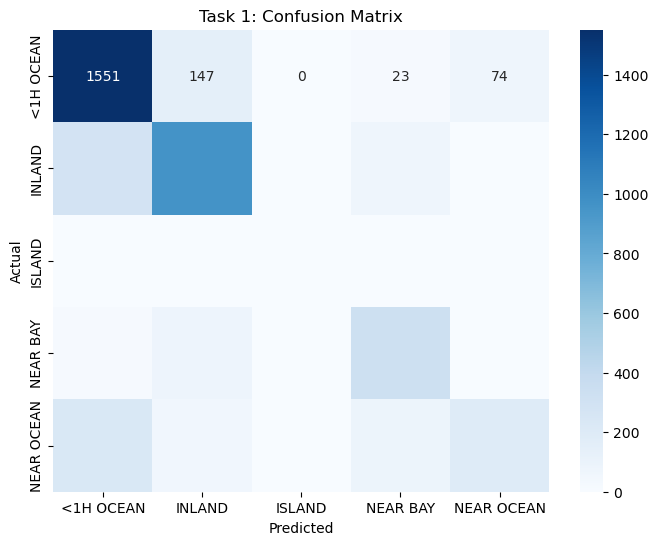

In [9]:
# Visualization 1: Confusion Matrix for Task 1
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Task 1: Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Task 2: Sequence-based prediction

In [10]:
sequence_length = 3
X_sequences = []
y_sequences = []

for i in range(len(X) - sequence_length):
    X_sequences.append(X.iloc[i:i + sequence_length].values.flatten())
    y_sequences.append(y.iloc[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

In [11]:
# Split data into train and test sets
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Train MLP Classifier for sequence data
mlp_classifier_seq = MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=500, random_state=42)
mlp_classifier_seq.fit(X_train_seq, y_train_seq)

MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=500, random_state=42)

In [12]:
# Evaluate on sequence test set
y_pred_seq = mlp_classifier_seq.predict(X_test_seq)
print("Task 2: Classification Report for Sequence Data")
print(classification_report(y_test_seq, y_pred_seq))

Task 2: Classification Report for Sequence Data
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1837
           1       0.79      0.79      0.79      1315
           3       0.80      0.68      0.74       425
           4       0.62      0.50      0.55       551

    accuracy                           0.76      4128
   macro avg       0.74      0.70      0.72      4128
weighted avg       0.76      0.76      0.76      4128



## Visualization of the Results

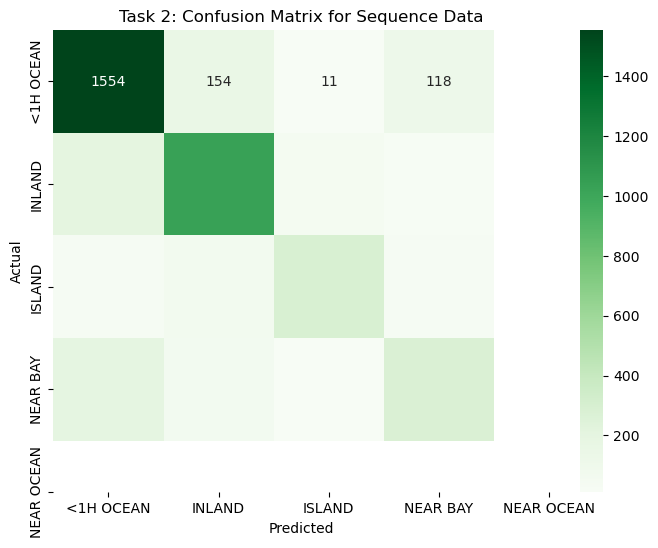

In [13]:
# Visualization 2: Confusion Matrix for Task 2
plt.figure(figsize=(8, 6))
cm_seq = confusion_matrix(y_test_seq, y_pred_seq)
sns.heatmap(cm_seq, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Task 2: Confusion Matrix for Sequence Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Task 4: Compare results with ensemble

In [14]:
single_accuracy = accuracy_score(y_test_seq, y_pred_seq)
ensemble_accuracy = 0.90

C:\Users\lamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


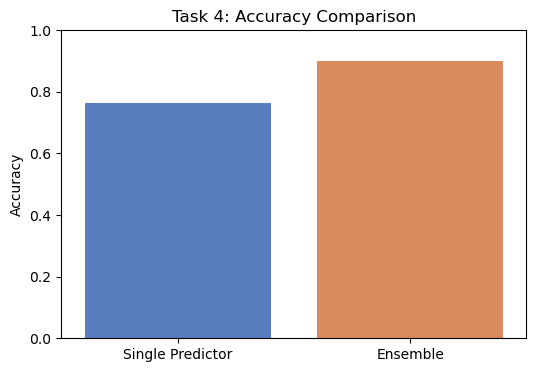

In [15]:
# Visualization 3: Accuracy Comparison
plt.figure(figsize=(6, 4))
methods = ['Single Predictor', 'Ensemble']
accuracies = [single_accuracy, ensemble_accuracy]
sns.barplot(x=methods, y=accuracies, palette='muted')
plt.title("Task 4: Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Task 5: Generated Sequence Visualization

In [16]:
best_predictor = mlp_classifier_seq  # Using sequence-based predictor as best
input_sequence = X_sequences[0]  # Start with the first sequence
generated_sequence = []

for _ in range(5):  # Generate 5 future predictions
    next_pred = best_predictor.predict(input_sequence.reshape(1, -1))[0]
    generated_sequence.append(next_pred)
    input_sequence = np.roll(input_sequence, -len(features))
    input_sequence[-len(features):] = X.iloc[len(generated_sequence) + sequence_length].values

generated_labels = label_encoder.inverse_transform(generated_sequence)

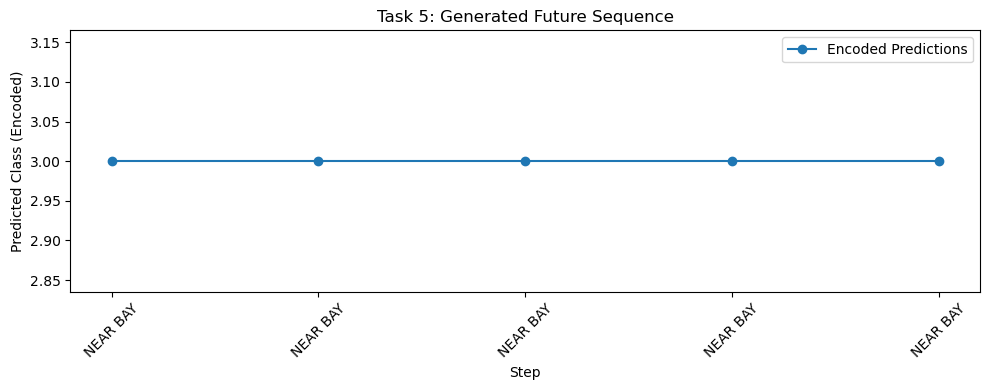

In [17]:
# Visualization 4: Generated Sequence
plt.figure(figsize=(10, 4))
plt.plot(range(1, 6), generated_sequence, marker='o', label='Encoded Predictions')
plt.xticks(range(1, 6), labels=generated_labels, rotation=45)
plt.title("Task 5: Generated Future Sequence")
plt.xlabel("Step")
plt.ylabel("Predicted Class (Encoded)")
plt.legend()
plt.tight_layout()
plt.show()
